In [32]:
import numpy
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
fm991 = numpy.fromfile(open('C:/Users/janat/Downloads/dados_1'), dtype=numpy.uint64)
fm992 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_2"), dtype=numpy.uint64)
fm993 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_3"), dtype=numpy.uint64)
fm994 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_4"), dtype=numpy.uint64)
fm995 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_5"), dtype=numpy.uint64)
dt6 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_6"), dtype=numpy.uint64)
dt7 = numpy.fromfile(open("C:/Users/janat/Downloads/dados_7"), dtype=numpy.uint64)
noise3 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_3"), dtype=numpy.uint64) #NO MESSAGE
noise2 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_2"), dtype=numpy.uint64) #NO MESSAGE
noise1 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint64) #NO MESSAGE



In [2]:
print(" shape dados 1 = {} \n shape dados 2 {} \n shape dados 3 {} \n shape dados 4 {} " 
     "\n shape dados 5 = {} \n shape dados 6 {} \n  shape dados 7 = {} \n shape dados 8 {} \n"
     "\n shape dados 9 = {} \n shape dados 10 {}"
      .format(fm991.shape,fm992.shape, fm993.shape,fm994.shape,fm995.shape,
             dt6.shape,dt7.shape, noise2.shape,noise1.shape,noise3.shape))

 shape dados 1 = (2162176,) 
 shape dados 2 (2489856,) 
 shape dados 3 (1769472,) 
 shape dados 4 (2031104,) 
 shape dados 5 = (2018816,) 
 shape dados 6 (1900032,) 
  shape dados 7 = (1867264,) 
 shape dados 8 (2194944,) 

 shape dados 9 = (2162176,) 
 shape dados 10 (1867264,)


In [3]:
ny0 = pd.DataFrame(noise1)
fmradio = pd.DataFrame(fm991)

In [4]:
#np.fft.fft2(fm991)
fft = np.fft.rfft(fm991) #Compute the one-dimensional discrete Fourier Transform for real input.

nfft = np.fft.rfftn(fm991) #Compute the N-dimensional discrete Fourier Transform for real input.
mascara = pd.DataFrame(nfft)
#pd.DataFrame(fft[0]>0)
mascara

,0
0,1.978294e+25+0.000000e+00j
1,-9.819581e+21+1.680559e+22j
2,1.335989e+22-1.741946e+21j
3,-1.194640e+22-1.400155e+22j
4,-1.128080e+22+1.167684e+21j
...,...
1081084,-1.291276e+21-2.140846e+21j
1081085,5.272846e+20-1.848731e+21j
1081086,1.934109e+21+1.763254e+21j
1081087,2.242467e+21-4.471291e+21j


## The dataset is refer to FM frequence of 99,1 signal

In [5]:
# Creating empy array to fill each columns with the dataset
empty_1 =  np.empty([5])
empty_1 = pd.DataFrame()
empty_1

""


In [6]:

conjunto = [fm991,fm991,fm991,fm991,fm991]
i=0
for i in range(0,5):
    empty_1[i] = pd.DataFrame(conjunto[i])
    i+=1
FM_1 = empty_1.loc[:49999]
FM_1 = FM_1.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
FM_1['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM_1

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,13321168144147331229,13321168144147331229,13321168144147331229,13321168144147331229,13321168144147331229,1
1,13496387586335239828,13496387586335239828,13496387586335239828,13496387586335239828,13496387586335239828,1
2,13496387586348600576,13496387586348600576,13496387586348600576,13496387586348600576,13496387586348600576,1
3,13496387586357858505,13496387586357858505,13496387586357858505,13496387586357858505,13496387586357858505,1
4,4192734652157185280,4192734652157185280,4192734652157185280,4192734652157185280,4192734652157185280,1
...,...,...,...,...,...,...
49995,4222050819019427072,4222050819019427072,4222050819019427072,4222050819019427072,4222050819019427072,1
49996,4294632502146682112,4294632502146682112,4294632502146682112,4294632502146682112,4294632502146682112,1
49997,4294632502145543959,4294632502145543959,4294632502145543959,4294632502145543959,4294632502145543959,1
49998,4294632499997850420,4294632499997850420,4294632499997850420,4294632499997850420,4294632499997850420,1


In [7]:
nfft = np.fft.rfftn(FM_1)
nfft = pd.DataFrame(nfft)

In [8]:
FM_1[['sinal1']]

,sinal1
0,13321168144147331229
1,13496387586335239828
2,13496387586348600576
3,13496387586357858505
4,4192734652157185280
...,...
49995,4222050819019427072
49996,4294632502146682112
49997,4294632502145543959
49998,4294632499997850420


<function matplotlib.pyplot.show(close=None, block=None)>

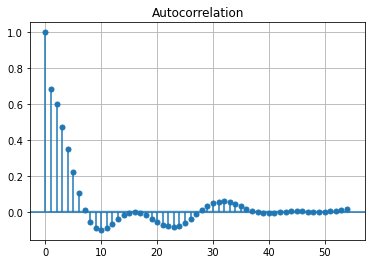

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
dados = mm.fit_transform(fmradio.loc[:199999] )

plot_acf(dados)
plt.grid(True)
plt.show

In [11]:
FM_1.mean()

sinal1    9.088537e+18
sinal2    9.088537e+18
sinal3    9.088537e+18
sinal4    9.088537e+18
sinal5    9.088537e+18
Signal    1.000000e+00
dtype: float64

In [12]:
# Creating empy array to fill each columns with the dataset
empty_2 =  np.empty([3])
empty_2 = pd.DataFrame()
empty_2

conjunto = [noise1,noise2,noise3]
i=0
for i in range(0,3):
    empty_2[i] = pd.DataFrame(conjunto[i])
    i+=1
FM_2 = empty_2.loc[:49999]
FM_02 = empty_2.loc[49999:99999]
FM_2 = FM_2.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3'})
FM_02 = FM_02.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3'}).reset_index()
FM_02 = FM_02.drop(columns='index')
FM_02.shape

(50001, 3)

In [13]:
FM_2['sinal4'] = FM_02['sinal1']
FM_2['sinal5'] = FM_02['sinal2']
FM_2['Signal'] = 0
FM_2 # NO SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,13321168146290068441,4118181896827849689,1.332117e+19,13491499254284648289,4289744172233837824,0
1,4289744172222753381,13491499258587703948,1.344878e+19,4292188337186635617,4167022224849292544,0
2,13439003606342397719,4257449078329630027,4.262337e+18,4289744170067662323,13496387584176438434,0
3,4262337412538579764,13496387584176438434,1.349150e+19,4167022222699322699,13448780266155863700,0
4,13496387584198630731,13496387584197492577,4.257449e+18,13496387584197492577,4167022224848154392,0
...,...,...,...,...,...,...
49995,13439003606342397719,4189625746497748130,4.262337e+18,13448780266166948143,13439003608487395169,0
49996,13419712621144628555,13439003604193566026,4.257449e+18,4167022224831440263,13439003610627418725,0
49997,13439003614922386021,13486610928655532559,1.349150e+19,13496387586347462424,13491499256434618135,0
49998,13448780263997062306,4262337414687411456,1.349150e+19,13439003610638503168,13491499260717362836,0


<function matplotlib.pyplot.show(close=None, block=None)>

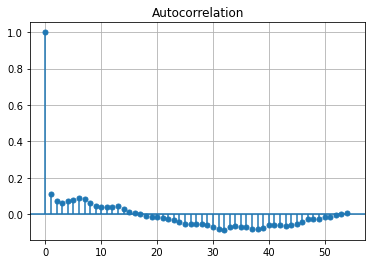

In [14]:
mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
nosignal1 = mm.fit_transform(ny0.loc[:199999])

plot_acf(nosignal1)
plt.grid(True)
plt.show



In [15]:
FM_2.mean()

sinal1    1.046433e+19
sinal2    1.039432e+19
sinal3    1.041313e+19
sinal4    1.043398e+19
sinal5    1.038430e+19
Signal    0.000000e+00
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

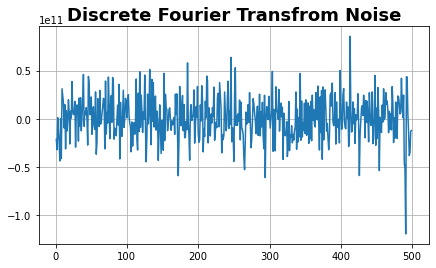

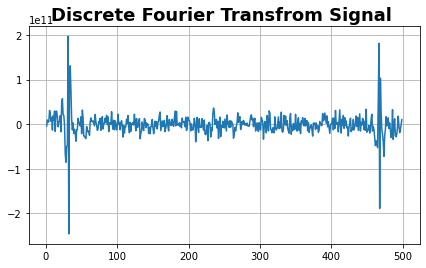

In [113]:
ny0 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint32) #NO MESSAGE
fm991 = numpy.fromfile(open('C:/Users/janat/Downloads/dados_1'), dtype=numpy.uint32) #message
#freq = np.fft.fftfreq()
NOsignal = ny0[:999]
Signal = fm991[:999]
##############################
fourier= np.fft.fft(NOsignal) # FFT FROM THE NO SIGNAL DATASET
no = NOsignal.size
timestep = 1/ no
freqno = np.fft.fftfreq(no,d=timestep)
mascara = freqno > 0
############################
plt.figure(figsize= (7,4))
plt.title("Discrete Fourier Transfrom Noise", size = 18, fontweight = 'bold')
plt.plot(freqno[mascara],fourier[mascara])
plt.grid(True)
plt.show
################################
fouriersignal= np.fft.fft(Signal) # FFT FROM THE NO SIGNAL DATASET
sig = Signal.size
timestep = 1/ sig
freqsign= np.fft.fftfreq(sig,d=timestep)
masksig = freqsign > 0
#########################
plt.figure(figsize= (7,4))
plt.title("Discrete Fourier Transfrom Signal ", size = 18, fontweight = 'bold')
plt.plot(freqsign[masksig],fouriersignal[masksig])
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

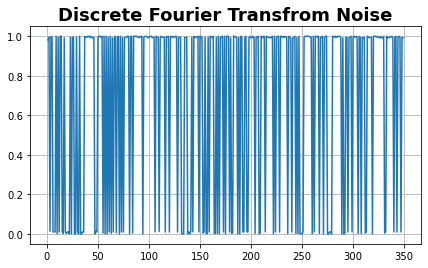

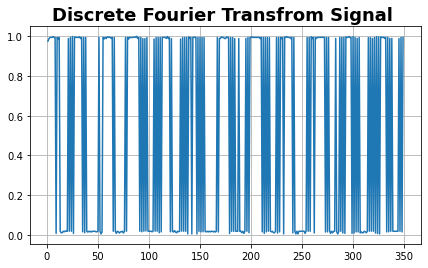

In [114]:
ny0 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint32) #NO MESSAGE
fm991 = numpy.fromfile(open('C:/Users/janat/Downloads/dados_1'), dtype=numpy.uint32) #message
ny0 , fm991 = pd.DataFrame(ny0), pd.DataFrame(fm991)
#################################
mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply
NOsignal = mm.fit_transform(ny0.loc[:699])
Signal = mm.fit_transform(fm991.loc[:699])
##############################
fourier= np.fft.fft(NOsignal) # FFT FROM THE NO SIGNAL DATASET
no = NOsignal.size
timestep = 1/ no
freqno = np.fft.fftfreq(no,d=timestep)
mascara = freqno > 0
############################
plt.figure(figsize= (7,4))
plt.title("Discrete Fourier Transfrom Noise", size = 18, fontweight = 'bold')
plt.plot(freqno[mascara],fourier[mascara])
plt.grid(True)
plt.show
################################
fouriersignal= np.fft.fft(Signal) # FFT FROM THE NO SIGNAL DATASET
sig = Signal.size
timestep = 1/ sig
freqsign= np.fft.fftfreq(sig,d=timestep)
masksig = freqsign > 0
#########################
plt.figure(figsize= (7,4))
plt.title("Discrete Fourier Transfrom Signal ", size = 18, fontweight = 'bold')
plt.plot(freqsign[masksig],fouriersignal[masksig])
plt.grid(True)
plt.show

In [99]:
gnu = pd.concat([FM_1, FM_2]).reset_index()
#gnu= gnu.drop(columns=['index'])
gnu # PUTTING ALL TOGETHER

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,13321168144147331229,13321168144147331229,1.332117e+19,13321168144147331229,13321168144147331229,1
1,1,13496387586335239828,13496387586335239828,1.349639e+19,13496387586335239828,13496387586335239828,1
2,2,13496387586348600576,13496387586348600576,1.349639e+19,13496387586348600576,13496387586348600576,1
3,3,13496387586357858505,13496387586357858505,1.349639e+19,13496387586357858505,13496387586357858505,1
4,4,4192734652157185280,4192734652157185280,4.192735e+18,4192734652157185280,4192734652157185280,1
...,...,...,...,...,...,...,...
99995,49995,13439003606342397719,4189625746497748130,4.262337e+18,13448780266166948143,13439003608487395169,0
99996,49996,13419712621144628555,13439003604193566026,4.257449e+18,4167022224831440263,13439003610627418725,0
99997,49997,13439003614922386021,13486610928655532559,1.349150e+19,13496387586347462424,13491499256434618135,0
99998,49998,13448780263997062306,4262337414687411456,1.349150e+19,13439003610638503168,13491499260717362836,0


In [41]:
gnu[gnu['Signal'] ==1].head() # JUST THE ONE HAS SIGNAL

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,13321168144147331229,13321168144147331229,1.332117e+19,13321168144147331229,13321168144147331229,1
1,1,13496387586335239828,13496387586335239828,1.349639e+19,13496387586335239828,13496387586335239828,1
2,2,13496387586348600576,13496387586348600576,1.349639e+19,13496387586348600576,13496387586348600576,1
3,3,13496387586357858505,13496387586357858505,1.349639e+19,13496387586357858505,13496387586357858505,1
4,4,4192734652157185280,4192734652157185280,4.192735e+18,4192734652157185280,4192734652157185280,1


In [42]:
gnu[gnu['Signal'] ==0].head() # NO SIGNAL

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
50000,0,13321168146290068441,4118181896827849689,1.332117e+19,13491499254284648289,4289744172233837824,0
50001,1,4289744172222753381,13491499258587703948,1.344878e+19,4292188337186635617,4167022224849292544,0
50002,2,13439003606342397719,4257449078329630027,4.262337e+18,4289744170067662323,13496387584176438434,0
50003,3,4262337412538579764,13496387584176438434,1.349150e+19,4167022222699322699,13448780266155863700,0
50004,4,13496387584198630731,13496387584197492577,4.257449e+18,13496387584197492577,4167022224848154392,0


In [43]:
gnu.shape

(100000, 7)

In [44]:
X = gnu.iloc[:,1:6] # THE TRAINING DATASET
X

,sinal1,sinal2,sinal3,sinal4,sinal5
0,13321168144147331229,13321168144147331229,1.332117e+19,13321168144147331229,13321168144147331229
1,13496387586335239828,13496387586335239828,1.349639e+19,13496387586335239828,13496387586335239828
2,13496387586348600576,13496387586348600576,1.349639e+19,13496387586348600576,13496387586348600576
3,13496387586357858505,13496387586357858505,1.349639e+19,13496387586357858505,13496387586357858505
4,4192734652157185280,4192734652157185280,4.192735e+18,4192734652157185280,4192734652157185280
...,...,...,...,...,...
99995,13439003606342397719,4189625746497748130,4.262337e+18,13448780266166948143,13439003608487395169
99996,13419712621144628555,13439003604193566026,4.257449e+18,4167022224831440263,13439003610627418725
99997,13439003614922386021,13486610928655532559,1.349150e+19,13496387586347462424,13491499256434618135
99998,13448780263997062306,4262337414687411456,1.349150e+19,13439003610638503168,13491499260717362836


In [45]:
y = gnu.iloc[:,6] # THE TARGET DATASET
y 

0        1
1        1
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Signal, Length: 100000, dtype: int64

In [47]:
gnu.rename_axis(['time'])

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
time,,,,,,,
0,0,13321168144147331229,13321168144147331229,1.332117e+19,13321168144147331229,13321168144147331229,1
1,1,13496387586335239828,13496387586335239828,1.349639e+19,13496387586335239828,13496387586335239828,1
2,2,13496387586348600576,13496387586348600576,1.349639e+19,13496387586348600576,13496387586348600576,1
3,3,13496387586357858505,13496387586357858505,1.349639e+19,13496387586357858505,13496387586357858505,1
4,4,4192734652157185280,4192734652157185280,4.192735e+18,4192734652157185280,4192734652157185280,1
...,...,...,...,...,...,...,...
99995,49995,13439003606342397719,4189625746497748130,4.262337e+18,13448780266166948143,13439003608487395169,0
99996,49996,13419712621144628555,13439003604193566026,4.257449e+18,4167022224831440263,13439003610627418725,0
99997,49997,13439003614922386021,13486610928655532559,1.349150e+19,13496387586347462424,13491499256434618135,0


In [48]:
FM_1.describe() #SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0
mean,9.088537e+18,9.088537e+18,9.088537e+18,9.088537e+18,9.088537e+18,1.0
std,4.607376e+18,4.607376e+18,4.607376e+18,4.607376e+18,4.607376e+18,0.0
min,4.112520e+18,4.112520e+18,4.112520e+18,4.112520e+18,4.112520e+18,1.0
25%,4.292188e+18,4.292188e+18,4.292188e+18,4.292188e+18,4.292188e+18,1.0
50%,1.343900e+19,1.343900e+19,1.343900e+19,1.343900e+19,1.343900e+19,1.0
75%,1.349639e+19,1.349639e+19,1.349639e+19,1.349639e+19,1.349639e+19,1.0
max,1.355880e+19,1.355880e+19,1.355880e+19,1.355880e+19,1.355880e+19,1.0


In [49]:
FM_2.describe() # NO SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0
mean,1.046433e+19,1.039432e+19,1.041313e+19,1.043398e+19,1.038430e+19,0.0
std,4.330809e+18,4.356200e+18,4.348659e+18,4.341987e+18,4.359764e+18,0.0
min,4.112520e+18,4.112520e+18,4.112520e+18,4.112520e+18,4.112520e+18,0.0
25%,4.257449e+18,4.257449e+18,4.257449e+18,4.257449e+18,4.257449e+18,0.0
50%,1.343900e+19,1.343900e+19,1.343900e+19,1.343900e+19,1.343900e+19,0.0
75%,1.349150e+19,1.349150e+19,1.349150e+19,1.349150e+19,1.349150e+19,0.0
max,1.353615e+19,1.353615e+19,1.353615e+19,1.353126e+19,1.353615e+19,0.0


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.35) # 35 % TO TEST 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

lenght x train = 65000 
 lenght x test = 35000 


In [115]:
mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)

In [116]:
X_train

array([[ 0.98678685,  0.98678685,  0.98678685,  0.98678685,  0.98678685],
       [ 0.97463731,  0.97463731,  0.97463731,  0.97463731,  0.97463731],
       [ 0.98678685,  0.98678685,  0.98678685,  0.98678685,  0.98678685],
       ...,
       [ 0.98575188,  0.98575188, -0.97953489, -0.96931499,  0.98471691],
       [ 0.98678685,  0.98678685,  0.98678685,  0.98678685,  0.98678685],
       [-0.96828001, -0.96828001, -0.96828001, -0.96828001, -0.96828001]])

In [117]:
X_test

array([[ 0.97670726, -0.96828001,  0.98678685,  0.98575188, -0.96931499],
       [-0.97953489, -0.97953489, -0.97953489, -0.97953489, -0.97953489],
       [-0.98846049, -0.98846049, -0.98846049, -0.98846049, -0.98846049],
       ...,
       [ 0.97463731,  0.97463731,  0.98678685,  0.98575188, -0.98846049],
       [-0.96144238, -0.96144238, -0.96144238, -0.96144238, -0.96144238],
       [ 0.98678685,  0.98678685, -0.98846049,  0.98575188,  0.98678685]])

### Creating KNN = ( K Neighrest Neighbour Classifier )
##### p, default=2
* Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. \newline

* for p = 2 , we have $\sqrt{(a1-b2)^{2} +(a1-b2)^{2}}$ , Euclidean Distance 
* for p = 1 , we have $ |(a1-b2)| + |(a1-b2)| $ , Manhattan Distance 

##### weights{‘uniform’, ‘distance’} or callable, default=’uniform’

* uniform’ : uniform weights. All points in each neighborhood are weighted equally.
* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### Types of Knn method
* KNN Classifier = chooses the same class as most of the 'n' nearest neighbors of the data to be sorted
* KNN Regressor = choose the average of the label of the 'n' neighbors

### Number of K, how do we choose ?
* $\sqrt{n}$ , where n can be number of data points
* Odd value of K is selected to avoid confusion between two classes of data
* By choosing smaller number, you can find yourself not much accurate, by chossing larger number , the classification may be tend to the label with more frequence

In [122]:
knn = KNeighborsClassifier(n_neighbors= 5, weights='uniform',p=1)  # WE CHOOSE MANHATAM DISTANCE
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [123]:
print(y_pred.shape)
print(y_test.shape)


(35000,)
(35000,)


RMSE (root mean squared error): is the measure that calculates "the root mean square" of errors between observed (actual) values and predictions (hypotheses).

$\sqrt{\frac{1}{n}\sum(yj - \vec{y}j)^{2} }$

* expresses the mean error of the predictive model, in relation to the original data (training and/or testing).
* They are in the 0-infinity range and return the magnitude of errors and not their direction.
* The smaller the better the cases

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
train_preds = knn.predict(X_train)
mse_1 = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_1)
###############################################
test_preds = knn.predict(X_test)
mse_2 = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_2)
##############################################
#,'Accuracy':accuracy.score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds)
metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.021483,0.025635,0.999343,0.999343,0.999342,1.0


#### How the score number was calculated ?

* Accuracy = $\frac{True Positive (TP) + False Positive (FP)}{Total} $

is the number of hits in our model divided by the total sample.

* Precision = $\frac{True Positive (TP) }{True Positive (TP) + False Positive (FP)} $

of all the data classified as positive, how many are actually positive.

* Recall = $\frac{True Positive (TP) }{True Positive (TP) + False Negative (FP)} $ 

what is the percentage of data classified as positive compared to the actual number of positives that exist in our sample.


* F1_Score = $\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$ 

this metric combines precision and recall in order to bring a single number that determines the overall quality of our model

Improving kNN performance in scikit-learn using GridSearchCV

So far we've used k =3 in kNN, but let's use GridSearchCV to find the best value for K .
When you use near neighbors, you have a much more variable prediction than you will use more neighbors:
* If you use only one neighbor, a forecast may change mainly from one point to another. When you think of your own neighbors, one may be quite different from the others. If you lived near a 1-N forecast outlier your right house.
* If you have multiple data points, the impact of an extremely different neighbor will be much smaller.
* If you use next risks, a prediction of each point risks being too close. 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance'],'p':range(1,2)
                #,'leaf_size':range(0,30)
             #,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
             }

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance'],'p':range(1,2)
              #,'leaf_size':range(0,30)
             #,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                        })

In [ ]:
gridsearch.best_params_

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
######################
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

################################
acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':gridsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,test_preds_grid),
       'F1_Score':f1_score(y_test,test_preds_grid),
      'Recall':recall_score(y_test,test_preds_grid)}
###############################
acc = pd.DataFrame([acc])
acc

#### Confusion Matrix
In the field of Machine Learning, a confusion matrix is a table that allows the visualization of the performance of a classification animal
* Compute confusion matrix to evaluate the accuracy of a classification.
* By definition a confusion matrix *C* is such that $C\small{i,j}*$ is equal to the number of observations known to be in group \textit{i}  and predicted to be in group \textit{j}  .

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds_grid)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize = (18,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, test_preds_grid))

In [ ]:
#from sklearn.model_selection import cross_val_score

#scores = cross_val_score(gridsearch , X, y,
#                         scoring="neg_mean_squared_error", cv=10)
#tree_rmse_scores = np.sqrt(-scores)